<a href="https://colab.research.google.com/github/suibhne-ofoighil/cmplxsys530-labs/blob/main/EpidemicAndPowerGridNetworkSimulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
from IPython import display
import networkx as nx
import time
from math import ceil

%matplotlib inline

# Epidemic: Mean Field and Computational Network Models

In [ ]:
N = 100 #100 #200  #1000

p_e = 0.06 # probability of edge generation
p_i = 0.1 # 0.5 # infection probability per contact
p_r = 0.1  # recovery probability

R0 = (N-1)*p_e*p_i/p_r
print(R0)

prev = []    # prevalence (total infected nodes/total nodes) in the network model
prev_mf = [] # prevalence (total infected nodes/total nodes) in the mean field model
susc_mf = [] # fraction of nodes that are susceptible in the mean field model


# Notes to try
# - adjust number of nodes but leave pe same
# - try slowing down dynamics and see if captures better
# - adjust number of nodes but reduce pe to get same overall connectivity
# - try big numbers of edges
# - try different R0 values (bigger and smaller approaching <1 and then <1)
# - etc.

5.9399999999999995


In [ ]:
def initialize(B):
    global g, nextg, prev, prev_mf, susc_mf

    prev = []    # prevalence (total infected nodes/total nodes) in the network model
    prev_mf = [] # prevalence (total infected nodes/total nodes) in the mean field model
    susc_mf = [] # fraction of nodes that are susceptible in the mean field model
      
    # Initialize network model
    k = int(ceil((N-1) * p_e))
    g = nx.watts_strogatz_graph(N, k, B)        # start with an ER graph
    g.pos = nx.spring_layout(g)
    nx.set_node_attributes(g, 0, 'state')  # everyone starts off susceptible
    g.nodes[1]['state'] = 1                 # set one node to be infected (index case)
    nextg = g.copy()
    nextg.pos = g.pos
    prev.append(1/len(g.nodes)) # initial prevalence in the real graph
    
    # Initialize mean field model
    susc_mf.append((N-1)/N) # initial susceptible fraction in the mean field model
    prev_mf.append(1/N) # initial prevalence in the mean field model

In [ ]:
def update():
    global g, nextg, prev, prev_mf, susc_mf
    
    # Update network model
    curprev = 0
    nextg = g.copy()
    nextg.pos = g.pos
    for a in g.nodes:
        if g.nodes[a]['state'] == 0: # if susceptible
            nextg.nodes[a]['state'] = 0
            for b in g.neighbors(a):
                if g.nodes[b]['state'] == 1: # if neighbor b is infected
                    if random() < p_i:
                        nextg.nodes[a]['state'] = 1
        elif g.nodes[a]['state'] ==1: # if infected
            curprev += 1
            nextg.nodes[a]['state'] = 2 if random() < p_r else 1
    prev.append(curprev/len(g.nodes()))
    g = nextg.copy()
    g.pos = nextg.pos
    
    # Update mean field model
    susc_mf.append(susc_mf[-1] - (N-1)*p_e*p_i*prev_mf[-1]*susc_mf[-1])
    prev_mf.append(prev_mf[-1] + (N-1)*p_e*p_i*prev_mf[-1]*susc_mf[-1] - p_r*prev_mf[-1])

In [ ]:
def observe():
    global g, prev, prev_mf, susc_mf
    cla()
    nx.draw(g, cmap = cm.plasma, vmin = 0, vmax = 2,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

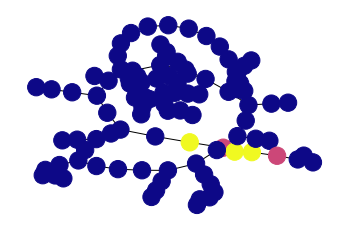

In [ ]:
initialize(B=0.3)
[ update() for i in range(10) ]
observe()

In [ ]:
res = []

for B in [i/100 for i in range(1, 100)]:
  initialize(B)
  
  #run model
  [ update() for j in range(25) ]
  
  #store results
  res.append([B, prev, prev_mf])

#Visualize ALL Results.
print("R0 is:", R0)
for B, prevelance, meanFieldPrevelance in res:

  print('B =', B)

  epicurve = scatter(range(len(prevelance)), prevelance)
  scatter(range(len(meanFieldPrevelance)), meanFieldPrevelance)
  xlabel("Time")
  ylabel("Prevalence")
  show(epicurve)

B = 0.01


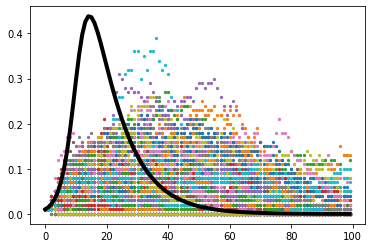

B = 0.25


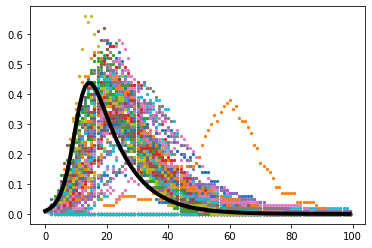

B = 0.5


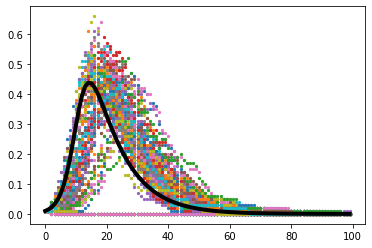

B = 0.75


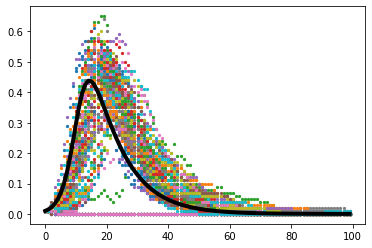

B = 0.99


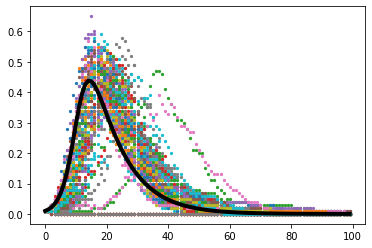

In [ ]:
timesteps = 100  # number of timesteps per simulation
numsims = 100    # number of simulations to run

res = []

for B in [0.01, 0.25, 0.5, 0.75, 0.99]:
  # this array will store the time series of fraction infected for each simulation
  prevarray = np.zeros([timesteps,numsims])  

  for i in range(0,numsims):        # loop over all simulations
      initialize(B)                  # initialize each simulation

      #simulate
      [ update() for j in range(1,timesteps) ]

      #store
      prevarray[:,i] = prev
      scatter(range(timesteps), prev, s=5)

  res.append((B, prevarray))

  print('B =', B)

  #plot meanfield
  plot(range(timesteps),prev_mf,'k', linewidth=4)
  show()

In [ ]:
for B, prevarray in res:
  print('B =', B)
  fill_between(range(timesteps), np.quantile(prevarray, .05, axis = 1), 
              np.quantile(prevarray, .95, axis = 1), facecolor='#7593C4')
  fill_between(range(timesteps), np.quantile(prevarray, .25, axis = 1), 
              np.quantile(prevarray, .75, axis = 1), facecolor='#B8CDEF')
  plot(range(timesteps), np.quantile(prevarray, .5, axis = 1), 'b',linewidth = 4)
  plot(range(timesteps),prev_mf,'k', linewidth=4)
  show()

In [ ]:
def initialize_2(B=None):
    global g, nextg, prev, prev_mf, susc_mf

    prev = []    # prevalence (total infected nodes/total nodes) in the network model
    prev_mf = [] # prevalence (total infected nodes/total nodes) in the mean field model
    susc_mf = [] # fraction of nodes that are susceptible in the mean field model
      
    # Initialize network model
    if B is None:
      g = nx.erdos_renyi_graph(N, p_e)
    else:
      k = int(ceil((N-1) * p_e))
      g = nx.watts_strogatz_graph(N, k, B)

    g.pos = nx.spring_layout(g)
    nx.set_node_attributes(g, 0, 'state')  # everyone starts off susceptible
    g.nodes[1]['state'] = 1                 # set one node to be infected (index case)
    nextg = g.copy()
    nextg.pos = g.pos
    prev.append(1/len(g.nodes)) # initial prevalence in the real graph
    
    # Initialize mean field model
    susc_mf.append((N-1)/N) # initial susceptible fraction in the mean field model
    prev_mf.append(1/N) # initial prevalence in the mean field model

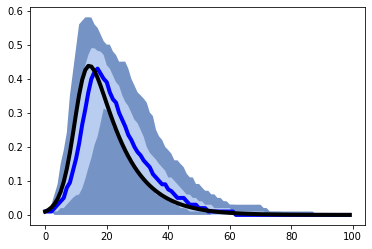

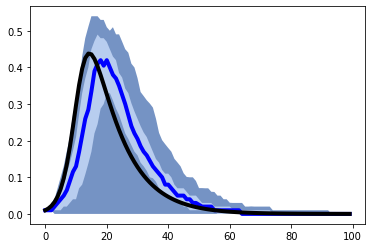

In [ ]:
timesteps = 100  # number of timesteps per simulation
numsims = 100    # number of simulations to run

for B in [None, 1]:

  for i in range(0,numsims):        # loop over all simulations
      initialize_2(B)                  # initialize each simulation

      #simulate
      [ update() for j in range(1,timesteps) ]

      #store
      prevarray[:,i] = prev

  fill_between(range(timesteps), np.quantile(prevarray, .05, axis = 1), 
              np.quantile(prevarray, .95, axis = 1), facecolor='#7593C4')
  fill_between(range(timesteps), np.quantile(prevarray, .25, axis = 1), 
              np.quantile(prevarray, .75, axis = 1), facecolor='#B8CDEF')
  plot(range(timesteps), np.quantile(prevarray, .5, axis = 1), 'b',linewidth = 4)
  plot(range(timesteps),prev_mf,'k', linewidth=4)
  show()

# Power Grid Model

In [ ]:
import random
N = 100
m = 2
runningGrids = []

def powerGridInit(minInitLoad=None, g_in=None):
  global g, N, m, runningGrids

  if g_in is None:
    g = nx.barabasi_albert_graph(N,m)
  else:
    g = g_in

  runningGrids = []

  # Each node is assigned a maximum capacity (the maximum power that node can 
  # handle) upon initialization, which we will draw from a normal distribution 
  # with mean 100 and standard deviation of 10.
  u = 100
  sd = 10

  # Each node also carries an electrical load, which is determined by the amount 
  # of power being drawn from that node (i.e. by houses, businessnes in the 
  # area, etc.). Because it is inefficient and potentially costly to design 
  # power stations with significantly more capacity than is typically needed, 
  # we will suppose that the power station loads can range up to but less than, 
  # the capacity, and set the initial loads to be drawn uniformly at random from 
  # 20% to 100% of each node’s capacity

  if minInitLoad is None:
    minInitLoad = 0.2

  "Initialize Nodes"
  if g_in is None:
    for n in range(N):
      capacity_n = np.random.normal(u, sd)
      initialLoad_n = np.random.uniform(low=capacity_n*minInitLoad, high=capacity_n)
      g.add_node(n, capacity=capacity_n, load=initialLoad_n, isRunning=True)

  else:
    attribute_dict = {}
    for Node in list(g.nodes()):
      capacity_n = np.random.normal(u, sd)
      initialLoad_n = np.random.uniform(low=capacity_n*minInitLoad, high=capacity_n)
      attribute_dict[Node] = {
          'capacity':capacity_n,
          'load':initialLoad_n,
          'isRunning':True
      }
    nx.set_node_attributes(g, attribute_dict)

In [ ]:
def countRunningGrids():
  global g
  return sum([True for n, d in g.nodes(data=True) if d['isRunning'] is True])

def updatePowerGrid():
  global g, runningGrids

  #randomize order
  randomUpdateOrder = random.sample(g.nodes(), k=N)

  for n in randomUpdateOrder:
    # If the node is already failed, nothing happens
    # If the node is running but it’s load is greater than it’s capacity, the node 
    # will turn to a failed node at the next time step. When this happens, its load 
    # will be evenly distributed to its neighbors that are still running.
    Node = g.nodes(data=True)[n]

    if Node['isRunning'] and Node['load'] > Node['capacity']:
      Node['isRunning'] = False
    
    elif not Node['isRunning'] and Node['load'] > 0:
      prevload = Node['load']
      Node['load'] -= prevload
      neighbors = list(g[n])
      numNeighbors = len(neighbors)
      distributionPerNeighbor = prevload / numNeighbors
      
      for j in neighbors:
        g.nodes(data=True)[j]['load'] += distributionPerNeighbor

  runningGrids.append(countRunningGrids())

In [ ]:
#return eigenvector centrality of triggered node.
def triggerOneRandomOutage():
  global g
  nodeName = np.random.choice(list(g.nodes))
  triggeredNode = g.nodes(data=True)[nodeName]
  excessSurge = 101 - triggeredNode['load']
  triggeredNode['load'] += excessSurge
  return nx.eigenvector_centrality(g)[nodeName]

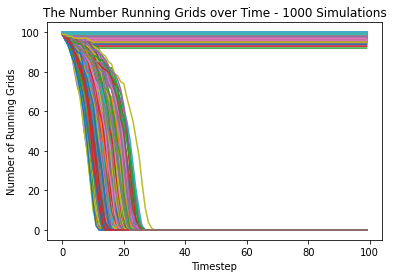

In [ ]:
steps = 100
sims = 1000

centralities = []
simMat = np.zeros([sims, steps])

for s in range(sims):
  powerGridInit()
  centralityOfTriggeredNode = triggerOneRandomOutage()

  [ updatePowerGrid() for t in range(steps) ]

  simMat[s] = runningGrids
  failed = runningGrids[steps - 1] == 0
  centralities.append((centralityOfTriggeredNode, failed))



# fill_between(range(steps), np.quantile(simMat, .05, axis = 1), 
#               np.quantile(simMat, .95, axis = 1), facecolor='#7593C4')
# fill_between(range(steps), np.quantile(simMat, .25, axis = 1), 
#             np.quantile(simMat, .75, axis = 1), facecolor='#B8CDEF')
# plot(range(steps), np.quantile(simMat, .5, axis = 1), 'b',linewidth = 4)
# show()

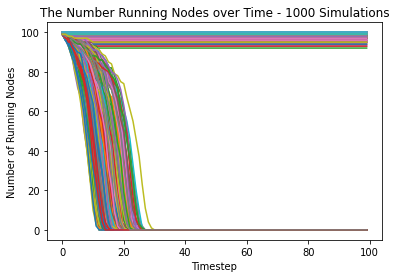

In [ ]:
for s in range(sims):
  plot(range(steps), simMat[s])

title('The Number Running Nodes over Time - 1000 Simulations')
ylabel('Number of Running Nodes')
xlabel('Timestep')
show()


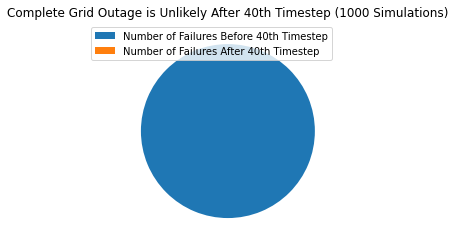

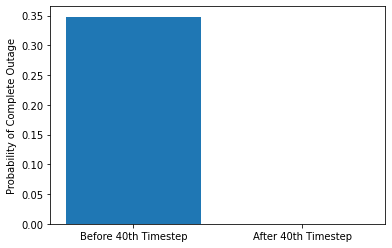

In [ ]:
numFailedBefore40 = sum(simMat[:, 40] == 0)
probabilityFailedBefore40 = numFailedBefore40 / sims

numFailedOverall = sum(simMat[:, steps - 1] == 0)
probabilityFailedAfter40 = (numFailedOverall - numFailedBefore40) / sims

pie([numFailedBefore40, numFailedOverall - numFailedBefore40])
legend(['Number of Failures Before 40th Timestep', 'Number of Failures After 40th Timestep'])
title('Complete Grid Outage is Unlikely After 40th Timestep (1000 Simulations)')
show()

bar(['Before 40th Timestep', 'After 40th Timestep'], [probabilityFailedBefore40, probabilityFailedAfter40])
ylabel('Probability of Complete Outage')
show()

In [ ]:
len(triggeredNodeCentralities)

1000

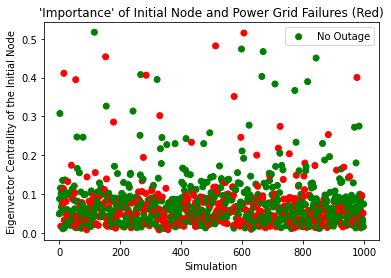

In [ ]:
triggeredNodeCentralities, failedGrids = zip(*centralities)
colors = ['r' if (failure == True) else 'g' for failure in failedGrids]
scatter(range(sims), triggeredNodeCentralities, color=colors)
xlabel('Simulation')
ylabel('Eigenvector Centrality of the Initial Node')
title("'Importance' of Initial Node and Power Grid Failures (Red)")
legend(['No Outage'])
show()

Now, let's vary the minimum initial load for each node, and see how this change affects the probability of a cascading outage

In [ ]:
steps = 100
sims = 1000

for minInitialLoad in [0.1, 0.5, 0.8]:
  centralities = []
  simMat = np.zeros([sims, steps])

  #simulations
  for s in range(sims):
    powerGridInit(minInitialLoad)
    centralityOfTriggeredNode = triggerOneRandomOutage()

    [ updatePowerGrid() for t in range(steps) ]

    simMat[s] = runningGrids
    failed = runningGrids[steps - 1] == 0
    centralities.append((centralityOfTriggeredNode, failed))

  #figure 1
  for s in range(sims):
    plot(range(steps), simMat[s])

  title('The Number Running Nodes over Time - 1000 Simulations')
  ylabel('Number of Running Nodes')
  xlabel('Timestep')
  show()

  #figure 2
  numFailedBefore40 = sum(simMat[:, 40] == 0)
  probabilityFailedBefore40 = numFailedBefore40 / sims

  numFailedOverall = sum(simMat[:, steps - 1] == 0)
  probabilityFailedAfter40 = (numFailedOverall - numFailedBefore40) / sims

  pie([numFailedBefore40, numFailedOverall - numFailedBefore40])
  legend(['Number of Failures Before 40th Timestep', 'Number of Failures After 40th Timestep'])
  title('Complete Grid Outage is Unlikely After 40th Timestep (1000 Simulations)')
  show()

  bar(['Before 40th Timestep', 'After 40th Timestep'], [probabilityFailedBefore40, probabilityFailedAfter40])
  ylabel('Probability of Complete Outage')
  show()

  #figure 3
  triggeredNodeCentralities, failedGrids = zip(*centralities)
  colors = ['r' if (failure == True) else 'g' for failure in failedGrids]
  scatter(range(sims), triggeredNodeCentralities, color=colors)
  xlabel('Simulation')
  ylabel('Eigenvector Centrality of the Initial Node')
  title("'Importance' of Initial Node and Power Grid Failures (Red)")
  legend(['No Outage'])
  show()

An undirected, unweighted network representing the topology of the Western States Power Grid of the United States. Data compiled by D. Watts and S. Strogatz - 

D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998).

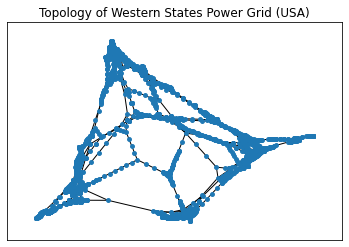

In [ ]:
G = nx.read_gml('/power.gml',label='id')
pos=nx.spectral_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=15)
title('Topology of Western States Power Grid (USA)')
show()

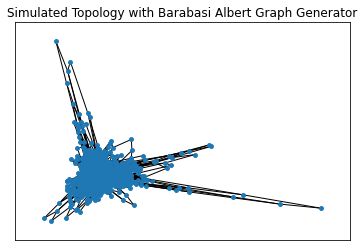

In [ ]:
medDegree = int(np.median([d for n,d in G.degree]))
numNodes = len(G.nodes)
simG = nx.barabasi_albert_graph(n=numNodes, m=medDegree)
pos=nx.spectral_layout(simG)
nx.draw_networkx(simG, pos, with_labels=False, node_size=15)
title('Simulated Topology with Barabasi-Albert Generator')
show()

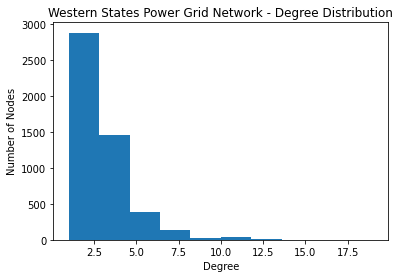

In [ ]:
hist(sorted([d for n,d in G.degree]))
title('Western States Power Grid Network - Degree Distribution')
ylabel('Number of Nodes')
xlabel('Degree')
show()

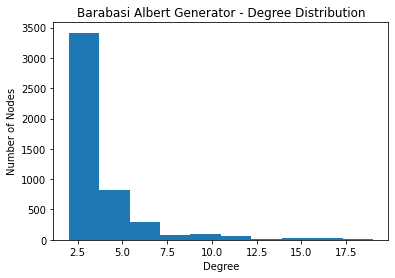

In [ ]:
hist(sorted([d for n,d in simG.degree if d < 20]))
title('Barabasi Albert Generator - Degree Distribution')
ylabel('Number of Nodes')
xlabel('Degree')
show()

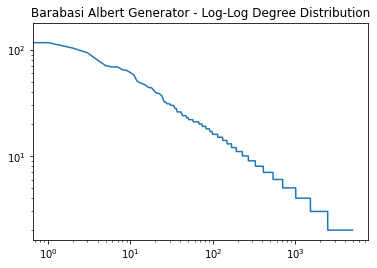

In [ ]:
loglog(sorted([d for n,d in simG.degree], reverse=True))
title('Barabasi Albert Generator - Log-Log Degree Distribution')
show()

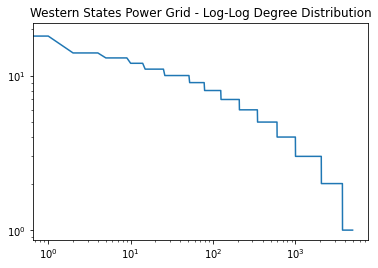

In [ ]:
loglog(sorted([d for n,d in G.degree], reverse=True))
title('Western States Power Grid - Log-Log Degree Distribution')
show()

In [ ]:
print(f'Max Degree of Barabasi-Albert Generator = {max([d for n,d in simG.degree])}')
print(f'Max Degree of Western States Power Grid Network = {max([d for n,d in G.degree])}')

Max Degree of Barabasi-Albert Generator = 146
Max Degree of Western States Power Grid Network = 19


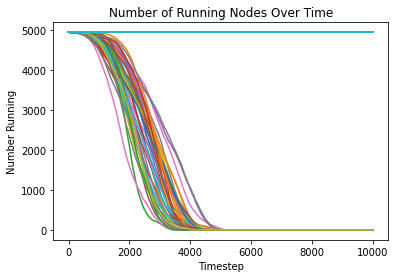

Text(0.5, 1.0, 'Distribution of Blackout Sizes (100 Simulations, 10000 Timesteps)')

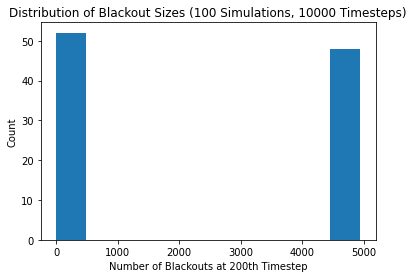

In [ ]:
dataMat = np.zeros([100, 10000])

#simulate
for sim in range(100):
  powerGridInit(minInitLoad=0.5, g_in=G)
  triggerOneRandomOutage()
  [ updatePowerGrid() for t in range(10000)]
  dataMat[sim] = runningGrids

#visualize simulations
for sim in range(100):
  plot(range(10000), dataMat[sim])
title('Number of Running Nodes Over Time')
xlabel('Timestep')
ylabel('Number Running')
show()

#blackout histogram
numNodes = len(G.nodes)
numFailedNodes = [  numNodes - dataMat[sim, 10000-1] for sim in range(100) ]
hist(numFailedNodes)
xlabel('Number of Blackouts at 200th Timestep')
ylabel('Count')
title('Distribution of Blackout Sizes (100 Simulations, 10000 Timesteps)')

In [ ]:
numFullBlackouts = sum([ True for count in numFailedNodes if count == numNodes ])
print(f'Percentage of Runs with Full Blackouts = {numFullBlackouts / 100}')

Percentage of Runs with Full Blackouts = 0.48
